In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [2]:
orgs_df = pd.read_csv("../data/classified_data/classified_organizations_v1").sample(10000)
inds_df = pd.read_csv("../data/classified_data/classified_individuals_v1", low_memory=False).sample(10000)
transactions = pd.read_csv("../data/classified_data/transactions_v1", low_memory=False)

In [3]:
orgs_df.head(3)

,id,name,state,entity_type,classification
63128,422065cd-0262-4ac9-a2a4-74136ddb99e2,floyd workman,MI,corporation,neutral
98258,dfd160b5-9389-44ef-a632-c08dc1a1d201,front 43,MI,corporation,neutral
1712,858415ce-d53f-4843-aee0-85560117bdc6,arizona federation of democratic women,NaN,vendor,neutral


In [4]:
orgs_df.classification.unique()

array(['neutral'], dtype=object)

In [5]:
orgs_df.loc[orgs_df.classification == 'f']

,id,name,state,entity_type,classification


In [6]:
transactions.head(2)

,transaction_id,donor_id,year,amount,recipient_id,office_sought,purpose,transaction_type,donor_type,recipient_type,donor_office
0,7773a71e-9f67-438e-8313-80b1b75deeb4,4544b60d-da6b-4dd5-9efe-334152ccf1f1,2018,1000.0,981a0414-b738-4e20-91b8-a29ee2cc7edf,none,bob worsley for state senate,contribute to a candidate committee,NaN,NaN,NaN
1,95f74915-a945-491f-8751-8c970a76fc24,946d7561-42a3-4a4b-b410-3a10271c9f18,2018,1000.0,981a0414-b738-4e20-91b8-a29ee2cc7edf,none,drew john for state house,contribute to a candidate committee,NaN,NaN,NaN


In [7]:
inds_df.classification.unique()

array(['neutral', 'f'], dtype=object)

In [8]:
inds_ids = set(inds_df.id.tolist())
orgs_ids = set(orgs_df.id.tolist())
trans_donorids = set(transactions.donor_id.tolist())
trans_recepids = set(transactions.recipient_id.tolist())
ind_id_there, org_id_there = [], []
for ind_id in inds_ids:
    if ind_id in trans_donorids:
        ind_id_there.append(ind_id)
    elif ind_id in trans_recepids:
        ind_id_there.append(ind_id)

for org_id in orgs_ids:
    if org_id in trans_donorids:
        org_id_there.append(org_id)
    elif org_id in trans_recepids:
        org_id_there.append(org_id)

len(inds_ids), len(ind_id_there), len(orgs_ids), len(org_id_there)

(9926, 9919, 10000, 10000)

In [9]:
a = []
for ind_id in inds_ids:
    if ((ind_id in trans_donorids) and (ind_id in trans_recepids)):
        a.append(ind_id)
a

['242d019c-e0ab-405e-8e77-abae7418b87f',
 '8b2ad550-64a1-4975-8b77-5eb1f24a8871',
 'aee69307-194f-4c40-af3d-a55a34e1068e',
 '55e5e946-6261-4f19-9752-fb58219b2e99',
 '4faf251a-73d9-46ef-9e17-d3cf0a3052ae',
 '3b5c0a9e-c6f2-44e9-ad05-fde071447564',
 '3936bdf5-9a7a-462c-9e8c-9124f2bd7f57',
 '13882059-3c74-4d9e-825d-a03a72b43b08',
 '50c78f1a-3e9b-4996-a319-eef4fe01ccfb',
 'ae96f38f-68c8-47e3-95b3-c6f096d3c22e',
 '74ba8a8a-7256-4eb3-b0f8-995f7a6319fb',
 '12823a76-78e2-4b09-b606-859efaa5c8ef',
 '9de9bf03-8c4a-4d2f-9a95-283b230ddfad',
 '588593b9-9bba-4597-94d9-1b3a7fd5b402',
 '5277b642-6bf0-4423-9350-3602ae51c6ac',
 'd98985b4-f55d-4ada-b279-0497e3176512',
 'c8586d36-f188-4684-aa99-193407d4d068',
 '3798fda1-83cd-4e48-974a-e1a390060198',
 'a536b509-f052-4984-a35d-10397308daec',
 '80996477-ce99-4f34-b5fc-bab4d676fc77',
 'cd1a740c-b1d7-4334-b335-925bd5708753',
 '46af8908-f4e4-4041-9d1e-5b442d051921',
 '2969075a-86d2-4b04-a991-a81832e096a0',
 'd0337f72-b701-4524-891b-c48ef6f771ec',
 '591aa72b-511b-

In [ ]:
data = {'id':['50c7d9a1-b448-46a5-8e2d-cd15b3097360','50c7d9a1-b448-46a5-8e2d-cd15b3097360','50c7d9a1-b448-46a5-8e2d-cd15b3097360',
              '62ea1e9c-ac12-400c-b3dc-519389c0f7d3','62ea1e9c-ac12-400c-b3dc-519389c0f7d3','62ea1e9c-ac12-400c-b3dc-519389c0f7d3',
              'd31df1ca-714e-4a82-9e88-1892c0451a71','d31df1ca-714e-4a82-9e88-1892c0451a71','62ea1e9c-ac12-400c-b3dc-519389c0f7d3',
              '4db76e6e-f0d5-40eb-82de-6dbcdb562dd7','f71341d7-d27e-47eb-9b66-903af39d6cb5','c875d7de-94be-42f1-b994-dd89b114d51e',
              '910c4d36-b036-469e-aa2a-ea4ff8855a6c','60d454d1-3773-4d88-80e9-132c161da0f0','1d2b5bc0-9385-4cd7-ac48-df43b3eca6fd',
              '1d2b5bc0-9385-4cd7-ac48-df43b3eca6fd','1d2b5bc0-9385-4cd7-ac48-df43b3eca6fe','1d2b5bc0-9385-4cd7-ac48-df43b3eca6ff',
              '1d2b5bc0-9385-4cd7-ac48-df43b3eca6fd'],
        'name':['REPUBLICAN STATE LEADERSHIP COMMITTEE MICHIGAN PAC','REPUBLICAN STATE LEADERSHIP COMMITTEE MICHIGAN PAC',
                'REPUBLICAN STATE LEADERSHIP COMMITTEE MICHIGAN PAC','UNITED FOOD AND COMMERCIAL WORKERS ACTIVE BALLOT CLUB',
                'UNITED FOOD AND COMMERCIAL WORKERS ACTIVE BALLOT CLUB','UNITED FOOD AND COMMERCIAL WORKERS ACTIVE BALLOT CLUB',
                'COMMITTEE TO ELECT DR PATRICIA BERNARD','COMMITTEE TO ELECT DR PATRICIA BERNARD','UNITED FOOD AND COMMERCIAL WORKERS ACTIVE BALLOT CLUB',
                'Ugi Utilities Inc/Ugi Energy Services Llc Pac','Pabar Pac (Pa Bar Assn)','Pa Fraternal Order Of Police Pac','Citizens For Kail',
                'Paa Pac','MICHIGAN ASSOCIATION OF NURSE ANESTHETISTS PAC','MICHIGAN ASSOCIATION OF NURSE ANESTHETISTS PAC',
                'MICHIGAN ASSOCIATION OF NURSE ANESTHETISTS PAC','MICHIGAN ASSOCIATION OF NURSE ANESTHETISTS PAC','Paa Pac'],
        'state':['MI','MI','MI','MI','MI','MI','MI','MI','MI','PA','PA','PA','PA','PA','MI','MI','MI','MI','PA'],
        'entity_type':['committee','committee','committee','committee','committee','committee','committee','committee','committee',
                       'Organization','Organization','Organization','Organization','Organization','committee','committee','committee','committee','Organization']}

sample_df = pd.DataFrame(data)
sample_df['donations'] = np.random.randint(100, 6000, sample_df.shape[0])
sample_df['donations_to'] = np.random.choice(sample_df.name.tolist(), size=len(sample_df))
sample_df['received'] = np.random.randint(0, 6000, sample_df.shape[0])
sample_df['donations_from'] = np.random.choice(sample_df.name.tolist(), size=len(sample_df))
sample_df.head(5)

### Some Considerations to Remember Moving Forward:
1. The 'get_likely_name' function takes in 3 string inputs. The data is not clean and when there are NaN entries, the function is somehow inputing null values as strings, so a column that has "Tim", "Walz" and Nan in the first, last, and full name columns, is being combined as "Tim Walz Nan". When calling this function account for this possibility

### Playing Around with Graphs

**Some considerations**
1. What attributes do we want each Node to Have?
- UUID, Name, Entity Type, Address, {from transactions table: money_donated and money_given}, affilition?
- Should transaction info also be included? If so, how would we show transaction info to multiple recipients / from multiple donors?

### Notes for Graphs
**Generating Graphs**
* nx.Graph() → the most simple undirected graph (edges going both ways)
* nx.DiGraph() → a graph with directed edges
* nx.MultiGraph() → multiple edges between nodes
* nx.MultiDiGraph() → the MultiGraph equivalent for directed graphs

**Finding Centrality**
There are 4 main ways to find the centrality of a node (how important or frequent is a node / how influential are some donors potentially)
* nx.degree_centrality : based on the assumption that important nodes have many connections
* nx.closeness_centrality : based on the assumption that important nodes are close to other nodes. It is calculated as the sum of the path lengths from the given node to all other nodes. 
* nx.eigenvector_centrality : assumes that important nodes connect other nodes. Considers the number of shortest paths between 2 nodes .For Graphs with a large number of nodes, the value of betweenness centrality is very high
* nx.betweeness_centrality : a measure of centrality in a graph based on shortest paths. For every pair of vertices in a connected graph, there exists at least one shortest path between the vertices such that either the number of edges that the path passes through (for unweighted graphs) or the sum of the weights of the edges (for weighted graphs) is minimized. The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex
* nx.pagerank : Page Rank Algorithm (developed by Google founders to measure the importance of webpages) assigns a score of importance to each node. Important nodes are those with many inlinks from important pages. It mainly works for Directed Networks

**Finding Connections**
* nx.find_cliques (undirected graphs): finds the maximum subgraphs based on the number of interconnected nodes
* nx.k_core : A k-core is a maximal subgraph that contains nodes of degree k or more. Groups clusters meeting the threshold k (can be used as a toggle)

**Sources**
* https://www.youtube.com/watch?v=VetBkjcm9Go
* https://www.activestate.com/blog/graph-theory-using-python-introduction-and-implementation/ 


### Things to think about
* Apply the deduplicated_uuids.csv info to the transactions table
* After doing a left join on the inds/orgs dataset with the transactions data, the recipient_id column needs to have a recipient_name column so that a new node can be created
* for ppl who have multiple donations {and so have various attributes like office_sought, purpose, transaction_type}, should this information be saved?

In [10]:
from utils.network import name_identifier
from utils.linkage import deduplicate_perfect_matches
transactions = transactions.loc[(transactions.recipient_id.isin(inds_df.id)) | 
                                (transactions.recipient_id.isin(orgs_df.id)) |
                                (transactions.donor_id.isin(inds_df.id)) |
                                (transactions.donor_id.isin(inds_df.id))]
inds = deduplicate_perfect_matches(inds_df) 
orgs = deduplicate_perfect_matches(orgs_df)
transactions["recipient_name"] = transactions["recipient_id"].apply(name_identifier, args=([orgs, inds],))

transactions.head(5)

,transaction_id,donor_id,year,amount,recipient_id,office_sought,purpose,transaction_type,donor_type,recipient_type,donor_office,recipient_name
0,7773a71e-9f67-438e-8313-80b1b75deeb4,4544b60d-da6b-4dd5-9efe-334152ccf1f1,2018,1000.0,981a0414-b738-4e20-91b8-a29ee2cc7edf,none,bob worsley for state senate,contribute to a candidate committee,NaN,NaN,NaN,#1022 arizona committee of automotive retailers
1,95f74915-a945-491f-8751-8c970a76fc24,946d7561-42a3-4a4b-b410-3a10271c9f18,2018,1000.0,981a0414-b738-4e20-91b8-a29ee2cc7edf,none,drew john for state house,contribute to a candidate committee,NaN,NaN,NaN,#1022 arizona committee of automotive retailers
2,d05f1763-132d-4717-addc-8ff6239ad4d9,c8f98436-9562-48ed-b51f-45b2b217aad1,2018,1000.0,981a0414-b738-4e20-91b8-a29ee2cc7edf,none,elect karen fann ld1,contribute to a candidate committee,NaN,NaN,NaN,#1022 arizona committee of automotive retailers
3,3dc3da30-6562-4755-bfad-6a26f1baec15,b9965bc2-c94d-4f69-98d1-bc4f5ad701c5,2018,1000.0,981a0414-b738-4e20-91b8-a29ee2cc7edf,none,elect noel campbell for house,contribute to a candidate committee,NaN,NaN,NaN,#1022 arizona committee of automotive retailers
4,a4340a2c-7b8a-4eeb-8290-746f0f436c83,946d7561-42a3-4a4b-b410-3a10271c9f18,2018,1000.0,981a0414-b738-4e20-91b8-a29ee2cc7edf,none,closed to new donations,refund from contrib to a cand committee,NaN,NaN,NaN,#1022 arizona committee of automotive retailers


In [13]:
x = transactions.loc[transactions.donor_id.isin(inds_df.id)]
len(x.recipient_name.unique())

87

In [12]:
# left merge according to ind_id and transaction donor_id. This was entities that only received money will still be there, no info from ind_dataset
# is lost
merged_inds_sample = pd.merge(inds_df,transactions,how='left',left_on='id',right_on='donor_id')
merged_inds_sample.dropna(subset = ['amount'], inplace=True)
merged_inds_sample.tail(5)

,id,first_name,last_name,full_name,entity_type,state,party,company,occupation,address,...,year,amount,recipient_id,office_sought,purpose,transaction_type,donor_type,recipient_type,donor_office,recipient_name
55243,0e24b503-b209-48b5-8edb-cca0cdaca78c,M.,TANG,m. tang ...,Individual,MD,NaN,NaN,NaN,6614 23RD PLACE,...,2022.0,2.0,49a2d46f-5e75-433c-94fa-f910e66d1a1e,NaN,NaN,direct,NaN,NaN,NaN,None
55244,0e24b503-b209-48b5-8edb-cca0cdaca78c,M.,TANG,m. tang ...,Individual,MD,NaN,NaN,NaN,6614 23RD PLACE,...,2022.0,95.0,49a2d46f-5e75-433c-94fa-f910e66d1a1e,NaN,NaN,direct,NaN,NaN,NaN,None
55245,0e24b503-b209-48b5-8edb-cca0cdaca78c,M.,TANG,m. tang ...,Individual,MD,NaN,NaN,NaN,6614 23RD PLACE,...,2022.0,10.0,49a2d46f-5e75-433c-94fa-f910e66d1a1e,NaN,NaN,direct,NaN,NaN,NaN,None
55246,a23037f6-741c-43a5-8a6d-0f1db4371e1d,OLIVIA N,DALMASSO,olivia n dalmasso ...,Individual,IL,NaN,NaN,NaN,PO BOX 574,...,2022.0,12.6,6b33721f-3f6a-47c0-bce2-284fc58e0d2a,NaN,NaN,direct,NaN,NaN,NaN,None
55247,a23037f6-741c-43a5-8a6d-0f1db4371e1d,OLIVIA N,DALMASSO,olivia n dalmasso ...,Individual,IL,NaN,NaN,NaN,PO BOX 574,...,2022.0,4.2,6b33721f-3f6a-47c0-bce2-284fc58e0d2a,NaN,NaN,direct,NaN,NaN,NaN,None


In [13]:
merged_inds_sample.columns

Index(['id', 'first_name', 'last_name', 'full_name', 'entity_type', 'state',
       'party', 'company', 'occupation', 'address', 'zip', 'city',
       'classification', 'transaction_id', 'donor_id', 'year', 'amount',
       'recipient_id', 'office_sought', 'purpose', 'transaction_type',
       'donor_type', 'recipient_type', 'donor_office', 'recipient_name'],
      dtype='object')

In [14]:
attribute_cols = merged_inds_sample.columns.difference(['donor_id','recipient_id','full_name','recipient_name'])
agg_functions = {col: 'sum' if col == 'amount' else 'first' for col in attribute_cols}
grouped_sample = merged_inds_sample.groupby(['donor_id','recipient_id','full_name','recipient_name']).agg(agg_functions).reset_index()
grouped_sample

,donor_id,recipient_id,full_name,recipient_name,address,amount,city,classification,company,donor_office,...,occupation,office_sought,party,purpose,recipient_type,state,transaction_id,transaction_type,year,zip
0,0007b184-4e1d-401a-ba51-99733d2e13e7,d461f2bd-9074-44b3-8948-e659bead3e58,graham filler ...,saginaw county republican committee,12705 WARM CREEK,500.00,DEWITT,neutral,None,None,...,None,None,None,None,None,MI,None,direct,2022.0,48820-0000
1,00523627-46c7-4f76-ab42-fb2c1fbac1b1,6126e78b-4e80-4361-a019-9d99aa1623ed,daniel millstone ...,rooted in community leadership pac,10518 ROUNTREE RD,0.77,LOS ANGELES,neutral,None,None,...,None,None,None,None,None,CA,None,direct,2022.0,90064-0000
2,00934782-86e5-4941-94cf-0a700100a2c0,2d1a0919-218e-4692-98ec-c4a73a126482,josie petersheim ...,mi greenstone pac,7196 W. BRIGGS RD.,25.00,STANTON,neutral,None,None,...,None,None,None,None,None,MI,None,direct,2022.0,48888-0000
3,00f22bdd-96bf-4074-9620-4737e8444958,af8417ee-5bca-49f5-91e9-d2de65d73631,robert doerfler ...,michigan senate democratic fund,1534 NE 5TH AVE,50.00,FORT LAUDERDALE,neutral,None,None,...,None,None,None,None,None,FL,None,direct,2022.0,33304-1006
4,0138403b-b5b9-453a-a1d2-b6ed9fa5fe58,6126e78b-4e80-4361-a019-9d99aa1623ed,joseph martinez ...,rooted in community leadership pac,139 HURON AVE,1.65,MOUNT CLEMENS,neutral,None,None,...,None,None,None,None,None,MI,None,direct,2022.0,48043-0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,fdccce6b-e55f-4f1d-bd95-1714f2a667ed,a3fe20e2-8019-448e-9b54-bfdce4d87f2f,michael olthoff ...,bumstead leadership fund,1499 MIDDLEBROOK DR,1000.00,NORTON SHORES,neutral,nichols,None,...,ceo,None,None,None,None,MI,None,direct,2022.0,49441-0000
1121,fe969829-b8a4-4d38-88e2-8314b340d567,6126e78b-4e80-4361-a019-9d99aa1623ed,joanna simon ...,rooted in community leadership pac,1546 POPLAR GROVE DR,3.82,RESTON,neutral,None,None,...,None,None,None,None,None,VA,None,direct,2022.0,20194-1731
1122,ff1423ba-ff5e-4bc1-b864-303a9dcc9b32,6126e78b-4e80-4361-a019-9d99aa1623ed,adriana p{on ce ...,rooted in community leadership pac,9 BIRCH CT,3.82,NORMAL,neutral,None,None,...,None,None,None,None,None,IL,None,direct,2022.0,61761-3900
1123,ff24644e-d64a-4a8a-a87f-cdb53b86dd63,6126e78b-4e80-4361-a019-9d99aa1623ed,david friedman ...,rooted in community leadership pac,8823 MOUNTAIN PATH CIR,0.15,AUSTIN,neutral,None,None,...,None,None,None,None,None,TX,None,direct,2022.0,78759-0000


In [17]:
def create_network_nodes(df: pd.DataFrame) -> nx.MultiDiGraph:
    G = nx.MultiDiGraph()
    # first check if df is individuals or organizations dataset
    if "name" in df.columns:
        node_name = "name"
    else:
        node_name = "full_name"
    
    transact_info = ['office_sought', 'purpose', 'transaction_type', 'year','transaction_id','donor_office','amount']
    for _, row in df.iterrows():  
        # add node attributes based on the columns relevant to the entity
        G.add_node(row[node_name])
        for column in df.columns.difference(transact_info):
            if not pd.isnull(row[column]):
                G.nodes[row[node_name]][column] = row[column]
        
        # link the donor node to the recipient node. add the attributes of the
        # edge based on relevant nodes 
        edge_dictionary = {}
        for column in transact_info:
            if not pd.isnull(row[column]):
                edge_dictionary[column] = row[column]
        G.add_edge(row[node_name], row['recipient_name'], **edge_dictionary)

        # the added 'recipient_name' node has no attributes at this moment
        # for the final code this line won't be necessary, as each recipient
        # should ideally be referenced later on. For now, all added nodes for
        # the recipient will only have one default attribute: classification
        G.nodes[row['recipient_name']]['classification'] = 'neutral'    
            
    edge_labels = {(u,v):d['amount'] for u,v,d in G.edges(data=True)}
    entity_colors = {'neutral': 'green', 'c':'blue', 'f':'red'}
    node_colors = [entity_colors[G.nodes[node]['classification']] for node in G.nodes()]

    nx.draw_planar(G, with_labels=False,node_color=node_colors)
    plt.figure(3,figsize=(12,12)) 
    nx.draw_networkx_edge_labels(G, pos=nx.planar_layout(G),edge_labels=edge_labels, label_pos=0.5)

    #nx.draw_planar(G, with_labels=False)
    plt.show()
    return G

In [122]:
#for u,v in G.nodes(data=True):
    #print(u)#['classification'])
    
G.nodes['michigan association of health plans political action committee']#['classification'])#['nancy                davis                               ']['classification']

{}

In [66]:
grouped_sample.classification.unique()

array(['neutral', 'f'], dtype=object)

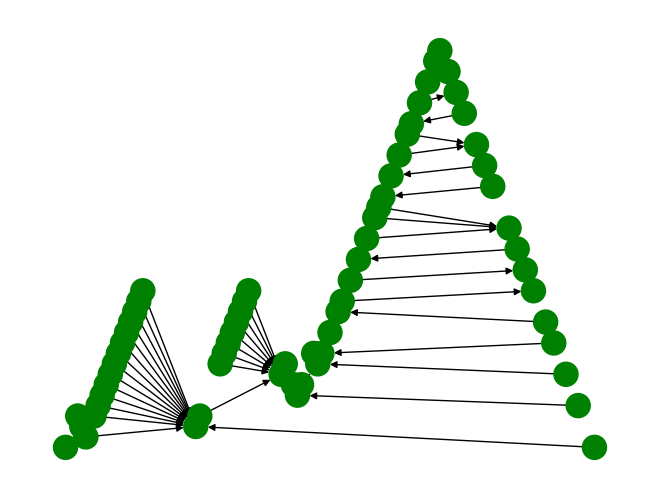

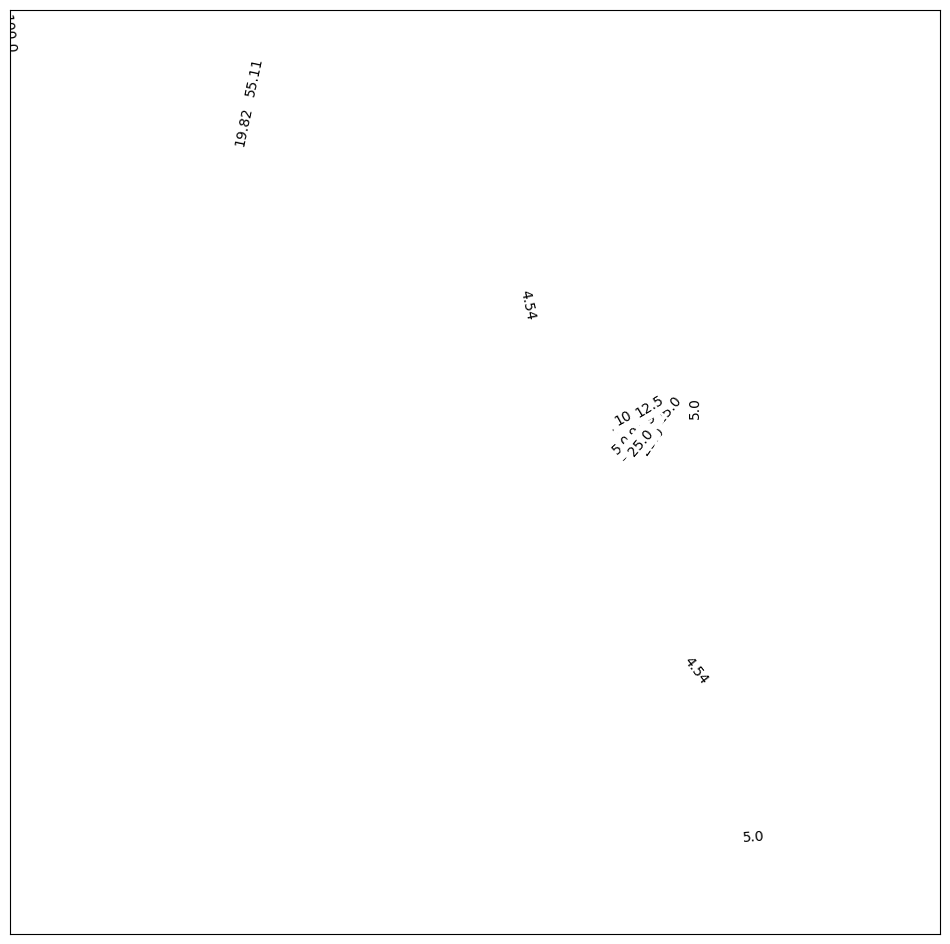

{'address': '3836 BRISTOL CT', 'city': 'CLARKSTON           ', 'classification': 'neutral', 'donor_id': 'c7f7a9e5-2e9e-47d1-92f6-2238c7ce301a', 'entity_type': 'Individual', 'first_name': 'THERESA             ', 'full_name': 'theresa              fougnie                             ', 'id': 'c7f7a9e5-2e9e-47d1-92f6-2238c7ce301a', 'last_name': 'FOUGNIE                             ', 'recipient_id': '520c9ce3-c702-4926-8688-750984ee6c0d', 'recipient_name': 'friends of sarah may seward', 'state': 'MI', 'zip': '48348-3610'}
{'classification': 'neutral'}
{'address': '330 BROAD ST APT 1', 'city': 'SPRING CITY         ', 'classification': 'neutral', 'donor_id': '318b9b37-369b-45ba-9802-27177198e694', 'entity_type': 'Individual', 'first_name': 'ERIC                ', 'full_name': 'eric                 oconnor                             ', 'id': '318b9b37-369b-45ba-9802-27177198e694', 'last_name': 'OCONNOR                             ', 'recipient_id': '6126e78b-4e80-4361-a019-9d99aa1623ed', 'r

In [16]:
matplot_G = create_network_nodes(grouped_sample.sample(50))
for v,d in matplot_G.nodes(data=True):
    #print(u)
    #print(v)
    print(d)

In [118]:
#for a,b in G.nodes(data=True):
    #print(G[node])#['classification'])
#    print(b)#['classification'])
entity_colors = {'neutral': 'green', 'c':'blue', 'f':'red'}
node_colors = [entity_colors.get(G.nodes[node].get('classification', 'neutral'), 'green') for node in G.nodes()]
node_colors

['green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green']

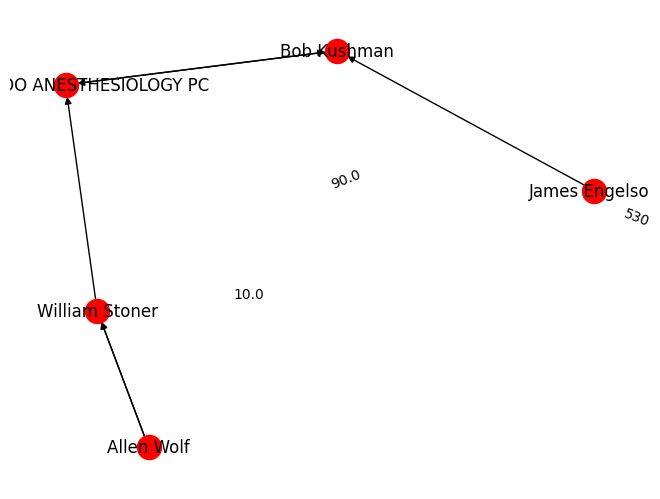

('William Stoner', 'KALAMAZOO ANESTHESIOLOGY PC', {'amount': 10.0, 'year': 2017})
('KALAMAZOO ANESTHESIOLOGY PC', 'Bob Kushman', {'amount': 1530})
('Bob Kushman', 'KALAMAZOO ANESTHESIOLOGY PC', {'amount': 530})
('James Engelson', 'Bob Kushman', {'amount': 90.0, 'year': 2019})
('Allen Wolf', 'William Stoner', {'amount': 111.5, 'year': 2018})
('Allen Wolf', 'William Stoner', {'amount': 11100.5, 'year': 2018})


In [36]:
G = nx.MultiDiGraph()
  
G.add_node("William Stoner", Age=10, Weight=110)
G.add_edge("William Stoner","KALAMAZOO ANESTHESIOLOGY PC",amount=10.00, year=2017)
G.add_node("KALAMAZOO ANESTHESIOLOGY PC", Age=50, Weight=180)
G.add_edge("KALAMAZOO ANESTHESIOLOGY PC","Bob Kushman",amount=1530)
G.add_node("Bob Kushman", Age=90, Weight=111)
G.add_edge("Bob Kushman","KALAMAZOO ANESTHESIOLOGY PC",amount=530)
G.add_node("James Engelson", Age=40, Weight=10)
G.add_edge("James Engelson","Bob Kushman",amount=90.00, year=2019,)
G.add_node("Allen Wolf", Age=30, Weight=1710)
G.add_edge("Allen Wolf","William Stoner",amount=111.50,year=2018)
G.add_edge("Allen Wolf","William Stoner",amount=11100.50,year=2018)



edge_labels = {(u,v):d['amount'] for u,v,d in G.edges(data=True)}
nx.draw(G, with_labels=True,node_color='red')
pos = nx.planar_layout(G)
for edge, label in edge_labels.items():
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels={edge: label}, label_pos=0.5, verticalalignment='center', horizontalalignment='center')
plt.show()
for edge in G.edges(data=True):
    print(edge)

In [35]:
G = nx.MultiDiGraph()

G.add_node("William Stoner", Age=10, Weight=110)
G.add_node("KALAMAZOO ANESTHESIOLOGY PC", Age=50, Weight=180)
G.add_node("Bob Kushman", Age=90, Weight=111)
G.add_node("James Engelson", Age=40, Weight=10)
G.add_node("Allen Wolf", Age=30, Weight=1710)

G.add_edge("William Stoner", "KALAMAZOO ANESTHESIOLOGY PC", weight=10.00, amount=10.00, year=2017)
G.add_edge("KALAMAZOO ANESTHESIOLOGY PC", "Bob Kushman", weight=1530, amount=1530, year=2017)
G.add_edge("Bob Kushman", "KALAMAZOO ANESTHESIOLOGY PC", weight=530, amount=530, year=2017)
G.add_edge("James Engelson", "Bob Kushman", weight=90.00, amount=90.00, year=2017)
G.add_edge("Allen Wolf", "William Stoner", weight=111.50, amount=111.50, year=2017)

# Create Plotly graph
edge_trace = go.Scatter(x=[], y=[], line=dict(color='#888'), hoverinfo='text', mode='lines')
hovertext = []

for edge in G.edges(data=True):
    x0, y0 = G.nodes[edge[0]]['Age'], G.nodes[edge[0]]['Weight']
    x1, y1 = G.nodes[edge[1]]['Age'], G.nodes[edge[1]]['Weight']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])
    hovertext.append(f"Amount: {edge[2]['amount']:.2f}, Weight: {edge[2]['weight']:.2f}")

edge_trace['hovertext'] = hovertext

node_trace = go.Scatter(x=[], y=[], text=[], mode='markers', hoverinfo='text', marker=dict(showscale=True, colorscale='YlGnBu', size=10))

for node in G.nodes():
    x, y = G.nodes[node]['Age'], G.nodes[node]['Weight']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_info = node + '<br>' + 'Age: ' + str(G.nodes[node]['Age']) + '<br>' + 'Weight: ' + str(G.nodes[node]['Weight'])
    node_trace['text'] += tuple([node_info])

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Plotly',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig.show()


In [58]:
def create_network_nodes(df: pd.DataFrame) -> nx.MultiDiGraph:
    G = nx.MultiDiGraph()
    
    # Define columns for edge attributes
    edge_columns = ['amount', 'donor_office', 'office_sought', 'party', 'purpose', 'transaction_id', 'transaction_type', 'year']
    # Define columns for node attributes
    node_columns = ['donor_id', 'recipient_id', 'full_name', 'recipient_name', 'address', 'city', 'classification', 'company', 'donor_type', 'entity_type', 'first_name', 'id', 'last_name', 'occupation', 'recipient_type', 'state', 'zip']
    
    for _, row in df.iterrows():  
        # Add nodes
        G.add_node(row['full_name'], **row[node_columns].dropna().to_dict())
        G.add_node(row['recipient_name'], classification='neutral')  # Adding recipient nodes with default classification

        # Add edges
        edge_attributes = row[edge_columns].dropna().to_dict()
        G.add_edge(row['full_name'], row['recipient_name'], **edge_attributes)
            
    return G

def plot_network_graph(G: nx.MultiDiGraph):
    edge_trace = go.Scatter(x=[], y=[], line=dict(color='#888'), hoverinfo='text', mode='lines')
    hovertext = []

    for edge in G.edges(data=True):
        source = edge[0]
        target = edge[1]
        hovertext.append(f"Amount: {edge[2]['amount']:.2f}")

    edge_trace['hovertext'] = hovertext

    node_trace = go.Scatter(x=[], y=[], text=[], mode='markers', hoverinfo='text', marker=dict(showscale=True, colorscale='YlGnBu', size=10))
    node_trace['marker']['color'] = []

    for node in G.nodes():
        node_info = f"Name: {node}<br>"
        for key, value in G.nodes[node].items():
            node_info += f"{key}: {value}<br>"
        node_trace['text'] += tuple([node_info])
        # Get the classification value for the node
        classification = G.nodes[node].get('classification', 'neutral')
        # Assign a color based on the classification value
        if classification == 'c':
            color = 'blue'
        elif classification == 'f':
            color = 'red'
        else:
            color = 'green'  # Default color for unknown classification
        node_trace['marker']['color'] += tuple([color])

    # Define layout settings
    layout = go.Layout(
        title='Network Graph Indicating Campaign Contributions from 2018-2022',
        titlefont=dict(size=16),
        showlegend=True,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(showgrid=True, zeroline=True, showticklabels=False),
        yaxis=dict(showgrid=True, zeroline=True, showticklabels=False)
    )

    fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

    # Log information about the figure

    fig.show()

sample = grouped_sample.sample(50)
plot_network_graph(create_network_nodes(sample))


In [39]:
G = nx.random_geometric_graph(200, 0.125)
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text


fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="graphs",
                    showarrow=True,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [ ]:
G = nx.Graph()
G.add_node(0)
nx.set_node_attributes(G, "red", name="color")
nx.set_node_attributes(G, 2, name="size")
G.add_node(1)
nx.set_node_attributes(G, np.nan, name='color')
G.nodes[0]

In [16]:
G = nx.from_pandas_edgelist(sample_df,source='name',target='donations_to',edge_attr=['donations','received'])
G.nodes()
pos=nx.spring_layout(G)
weights = list(nx.get_edge_attributes(G,'donations').values())
weights = [i/5000 for i in weights]
node_color = [G.degree(v) for v in G] 
#node_size = [0.0005 * nx.get_node_attributes(G, 'donations')[v] for v in G] 
nx.draw_networkx_nodes(G, pos, node_color=node_color)#, node_size=node_size) 
nx.draw_networkx_edges(G, pos, width=weights)
nx.draw_networkx_labels(G, pos)

NetworkXError: Invalid edge_attr argument: ['donations', 'received']

In [ ]:

# fixing the size of the figure 
plt.figure(figsize =(10, 7)) 

node_color = [G.degree(v) for v in G] 
# node colour is a list of degrees of nodes 

node_size = [0.0005 * nx.get_node_attributes(G, 'population')[v] for v in G] 
# size of node is a list of population of cities 

edge_width = [0.0015 * G[u][v]['weight'] for u, v in G.edges()] 
# width of edge is a list of weight of edges 

nx.draw_networkx(G, node_size = node_size, 
				node_color = node_color, alpha = 0.7, 
				with_labels = True, width = edge_width, 
				edge_color ='.4', cmap = plt.cm.Blues) 

plt.axis('off') 
plt.tight_layout(); 

In [ ]:
G = nx.MultiDiGraph()
G.add_node(0)
nx.set_node_attributes(G, "red", name="color")
nx.set_node_attributes(G, 4, name = 'size')
G.add_node(2)
nx.set_node_attributes(G, "white", name='color')
G.nodes[2]

In [ ]:
G.add_node(2)
nx.set_node_attributes(G, 4, name='age')
G.nodes[2]